<a href="https://colab.research.google.com/github/yogaaditandanu/Sentiment-Analysis-Wondr-BNI/blob/main/Project_Wondr_by_BNI_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT MODUL**

In [ ]:
!pip install google-play-scraper

# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None # Menonaktifkan peringatan chaining
import numpy as np # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed) # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt # Matplotlib untuk visualisasi data
import seaborn as sns # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer untuk ekstraksi fitur
from sklearn.model_selection import train_test_split # Import train_test_split untuk membagi data

import datetime as dt # Manipulasi data waktu dan tanggal
import re # Modul untuk bekerja dengan ekspresi reguler
import string # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize # Tokenisasi teks
from nltk.corpus import stopwords # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt') # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords') # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Scraping Dataset**

In [ ]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort

# Mengambil semua ulasan dari aplikasi dengan ID 'com.byu.id' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'id.bni.wondr',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1000
)

In [ ]:
# Menyimpan ulasan dalam file CSV
import csv

with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

# **Loading Dataset**

In [ ]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [ ]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e54ff8e1-f057-4a62-a326-aecac0ebcc1f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ui pengalaman pengguna masih jelek, dan masih ...",2,43,1.4.4,2025-10-31 13:00:44,"Hai Kak Riqi Maulana, mohon maaf atas ketidakn...",2025-10-31 13:16:03,1.4.4
1,f7e5c736-fd9b-4ffc-9929-1d7b41c5ca04,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"respon yang lambat, jaringan sudah aman tapi a...",2,66,1.4.4,2025-11-01 03:33:19,"Hai Kak Rezki Delfitra, maaf atas kendalanya. ...",2025-11-01 04:13:26,1.4.4
2,6dee7eab-187e-4842-8c29-0d0bf2d81739,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi nya lambat, untuk login saja sulit. S...",1,7,1.4.4,2025-11-08 16:18:13,"Hai Kak Sugar Daddy, maaf utk kendalanya Kak. ...",2025-11-09 01:17:24,1.4.4
3,8cd560bb-d3f6-46aa-9267-dde385d13ee6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Halo, jujur wondr ini menurutku mudah digunaka...",3,9,1.4.4,2025-10-31 12:12:26,"Hai Kak Bilaa A, maaf untuk kendalanya. Pastik...",2025-10-31 12:57:07,1.4.4
4,556eced0-79ff-49a4-bc7e-91adc739dcbe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Loading splash screennya seringkali lama, saya...",2,94,1.4.4,2025-10-07 06:16:12,"Halo Kak Analisa, maaf atas kendalanya. Supaya...",2025-10-07 06:37:43,1.4.4


In [ ]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63449 entries, 0 to 63448
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              63449 non-null  object        
 1   userName              63449 non-null  object        
 2   userImage             63449 non-null  object        
 3   content               63449 non-null  object        
 4   score                 63449 non-null  int64         
 5   thumbsUpCount         63449 non-null  int64         
 6   reviewCreatedVersion  57629 non-null  object        
 7   at                    63449 non-null  datetime64[ns]
 8   replyContent          27004 non-null  object        
 9   repliedAt             27004 non-null  datetime64[ns]
 10  appVersion            57629 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 5.3+ MB


# **Data Cleaning**

In [ ]:
import pandas as pd

# Cek persentase nilai null di tiap kolom
app_reviews_df.isnull().mean() * 100


,0
reviewId,0.000000
userName,0.000000
userImage,0.000000
content,0.000000
score,0.000000
thumbsUpCount,0.000000
reviewCreatedVersion,9.172721
at,0.000000
replyContent,57.439834
repliedAt,57.439834


In [ ]:
import pandas as pd

#Buat salinan dari data mentah
clean_df = app_reviews_df.copy()

# 2️⃣ Isi nilai NaN di kolom teks & versi
clean_df['replyContent'] = clean_df['replyContent'].fillna('')
clean_df['reviewCreatedVersion'] = clean_df['reviewCreatedVersion'].fillna('Unknown')
clean_df['appVersion'] = clean_df['appVersion'].fillna('Unknown')

# 3️⃣ Tangani kolom datetime repliedAt (isi dengan string "No Reply")
clean_df['repliedAt'] = clean_df['repliedAt'].astype('string').fillna('No Reply')

# 4️⃣ Hapus duplikat kalau ada (berdasarkan userName + content)
clean_df = clean_df.drop_duplicates(subset=['userName', 'content'])

# 5️⃣ Cek hasil akhir
print("Jumlah data setelah cleaning:", len(clean_df))
print(clean_df.isnull().sum())


Jumlah data setelah cleaning: 40534
reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64


In [ ]:
# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40534 entries, 0 to 63448
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              40534 non-null  object        
 1   userName              40534 non-null  object        
 2   userImage             40534 non-null  object        
 3   content               40534 non-null  object        
 4   score                 40534 non-null  int64         
 5   thumbsUpCount         40534 non-null  int64         
 6   reviewCreatedVersion  40534 non-null  object        
 7   at                    40534 non-null  datetime64[ns]
 8   replyContent          40534 non-null  object        
 9   repliedAt             40534 non-null  string        
 10  appVersion            40534 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7), string(1)
memory usage: 3.7+ MB


# **PRE-PROCESSING TEXT**

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
  words = text.split()
  fixed_words = []
  for word in words:
    if word.lower() in slangwords:
      fixed_words.append(slangwords[word.lower()])
    else:
      fixed_words.append(word)
  fixed_text = ' '.join(fixed_words)
  return fixed_text

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,e54ff8e1-f057-4a62-a326-aecac0ebcc1f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ui pengalaman pengguna masih jelek, dan masih ...",2,43,1.4.4,2025-10-31 13:00:44,"Hai Kak Riqi Maulana, mohon maaf atas ketidakn...",2025-10-31 13:16:03,1.4.4,Ui pengalaman pengguna masih jelek dan masih s...,ui pengalaman pengguna masih jelek dan masih s...,ui pengalaman pengguna masih jelek dan masih s...,"[ui, pengalaman, pengguna, masih, jelek, dan, ...","[ui, pengalaman, pengguna, jelek, stabil, paka...",ui pengalaman pengguna jelek stabil pakai bni ...
1,f7e5c736-fd9b-4ffc-9929-1d7b41c5ca04,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"respon yang lambat, jaringan sudah aman tapi a...",2,66,1.4.4,2025-11-01 03:33:19,"Hai Kak Rezki Delfitra, maaf atas kendalanya. ...",2025-11-01 04:13:26,1.4.4,respon yang lambat jaringan sudah aman tapi ap...,respon yang lambat jaringan sudah aman tapi ap...,respon yang lambat jaringan sudah aman tapi ap...,"[respon, yang, lambat, jaringan, sudah, aman, ...","[respon, lambat, jaringan, aman, aplikasi, ter...",respon lambat jaringan aman aplikasi terbuka k...
2,6dee7eab-187e-4842-8c29-0d0bf2d81739,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi nya lambat, untuk login saja sulit. S...",1,7,1.4.4,2025-11-08 16:18:13,"Hai Kak Sugar Daddy, maaf utk kendalanya Kak. ...",2025-11-09 01:17:24,1.4.4,Aplikasi nya lambat untuk login saja sulit Sud...,aplikasi nya lambat untuk login saja sulit sud...,aplikasi nya lambat untuk login saja sulit sud...,"[aplikasi, nya, lambat, untuk, login, saja, su...","[aplikasi, lambat, login, sulit, komplen, resp...",aplikasi lambat login sulit komplen responnya ...
3,8cd560bb-d3f6-46aa-9267-dde385d13ee6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Halo, jujur wondr ini menurutku mudah digunaka...",3,9,1.4.4,2025-10-31 12:12:26,"Hai Kak Bilaa A, maaf untuk kendalanya. Pastik...",2025-10-31 12:57:07,1.4.4,Halo jujur wondr ini menurutku mudah digunakan...,halo jujur wondr ini menurutku mudah digunakan...,halo jujur wondr ini menurutku mudah digunakan...,"[halo, jujur, wondr, ini, menurutku, mudah, di...","[halo, jujur, wondr, menurutku, mudah, fiturny...",halo jujur wondr menurutku mudah fiturnya apk ...
4,556eced0-79ff-49a4-bc7e-91adc739dcbe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Loading splash screennya seringkali lama, saya...",2,94,1.4.4,2025-10-07 06:16:12,"Halo Kak Analisa, maaf atas kendalanya. Supaya...",2025-10-07 06:37:43,1.4.4,Loading splash screennya seringkali lama saya ...,loading splash screennya seringkali lama saya ...,loading splash screennya seringkali lama saya ...,"[loading, splash, screennya, seringkali, lama,...","[loading, splash, screennya, seringkali, duga,...",loading splash screennya seringkali duga berhu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63444,3eb60c12-0356-45ae-91b8-0745c3ed204b,yogo untoro,https://play-lh.googleusercontent.com/a-/ALV-U...,Terbaik.....,5,0,Unknown,2025-09-08 00:06:22,,No Reply,Unknown,Terbaik,terbaik,terbaik,[terbaik],[terbaik],terbaik
63445,619935b5-8dcc-4c71-940c-1d7da348f4f3,Putra Nugraha,https://play-lh.googleusercontent.com/a-/ALV-U...,Mantappppp..... 👍👍👍👍👍,5,0,Unknown,2025-01-25 14:47:28,"Hai Kak Putra Nugraha, terima kasih atas keper...",2025-01-25 14:56:43,Unknown,Mantappppp,mantappppp,mantappppp,[mantappppp],[mantappppp],mantappppp
63446,63beafac-7415-4fee-8ceb-e0e373472895,Armen Memen,https://play-lh.googleusercontent.com/a-/ALV-U...,Ok ..,5,0,Unknown,2025-01-01 01:16:21,"Hi Mr/Ms Armen Memen, thank you for the positi...",2025-01-01 01:31:41,Unknown,Ok,ok,ok,[ok],[ok],ok
63447,0a880d0c-eca7-473b-9870-0f88dc11960b,Antiq_ u,https://play-lh.googleusercontent.com/a/ACg8

# **Labelling Data**

In [ ]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    25242
negative    15292
Name: count, dtype: int64


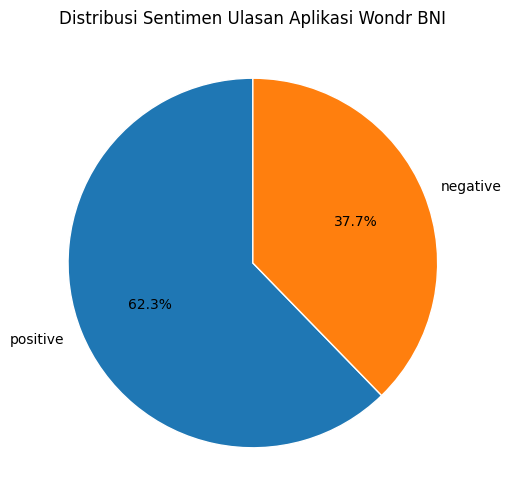

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah tiap kategori sentimen langsung dari dataframe
sentiment_counts = clean_df['polarity'].value_counts()

# Membuat diagram lingkaran
plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Distribusi Sentimen Ulasan Aplikasi Wondr BNI')
plt.show()


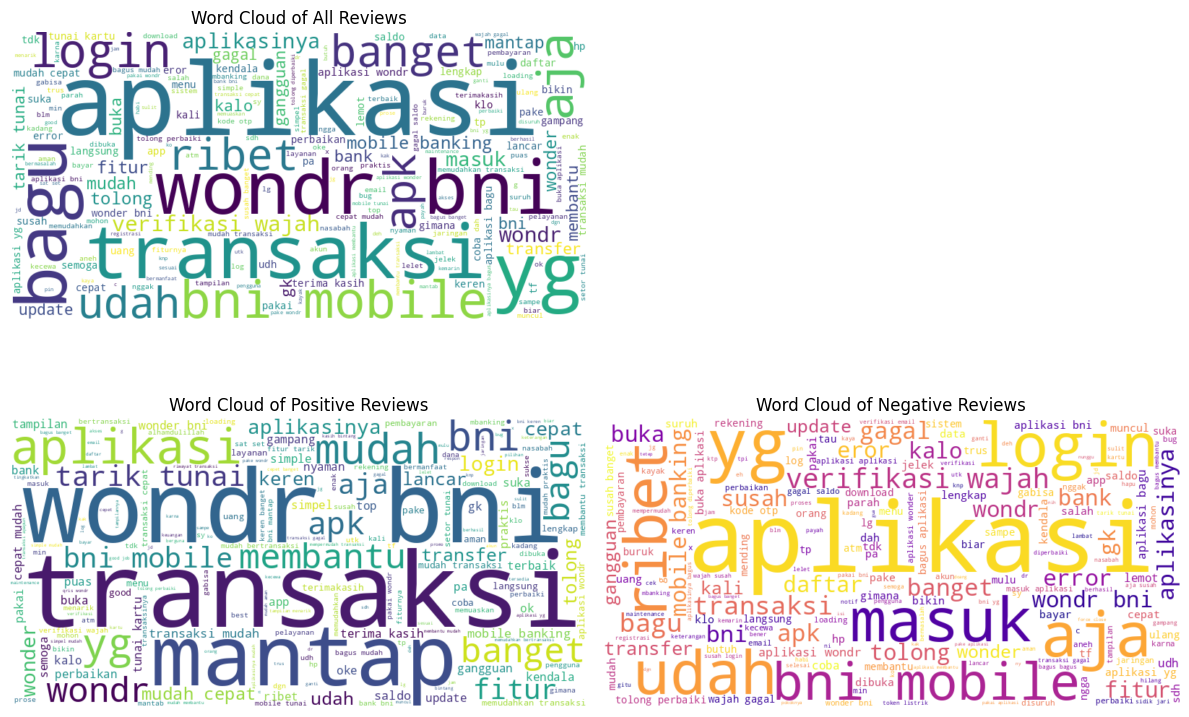

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan teks berdasarkan sentimen
all_text = ' '.join(clean_df['text_akhir'])
pos_text = ' '.join(clean_df[clean_df['polarity'] == 'positive']['text_akhir'])
neg_text = ' '.join(clean_df[clean_df['polarity'] == 'negative']['text_akhir'])

# Membuat WordCloud
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(neg_text)

# Plot tiga word cloud
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Reviews')

plt.subplot(2, 2, 3)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')

plt.subplot(2, 2, 4)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')

plt.tight_layout()
plt.show()

# **Data Splitting dan Ekstraksi Fitur dengan TF-IDF**

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# **Modeling**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8052857186912141
Naive Bayes - accuracy_test: 0.8057234488713457


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9752983624757147
Random Forest - accuracy_test: 0.8908350807943752


In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9056341937274494
Logistic Regression - accuracy_test: 0.9063772048846676


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9752983624757147
Decision Tree - accuracy_test: 0.8565437276427779


Tabel Perbandingan Akurasi Model:
              Model  Akurasi Data Latih  Akurasi Data Uji
        Naive Bayes            0.805286          0.805723
      Random Forest            0.975298          0.890835
Logistic Regression            0.905634          0.906377
      Decision Tree            0.975298          0.856544




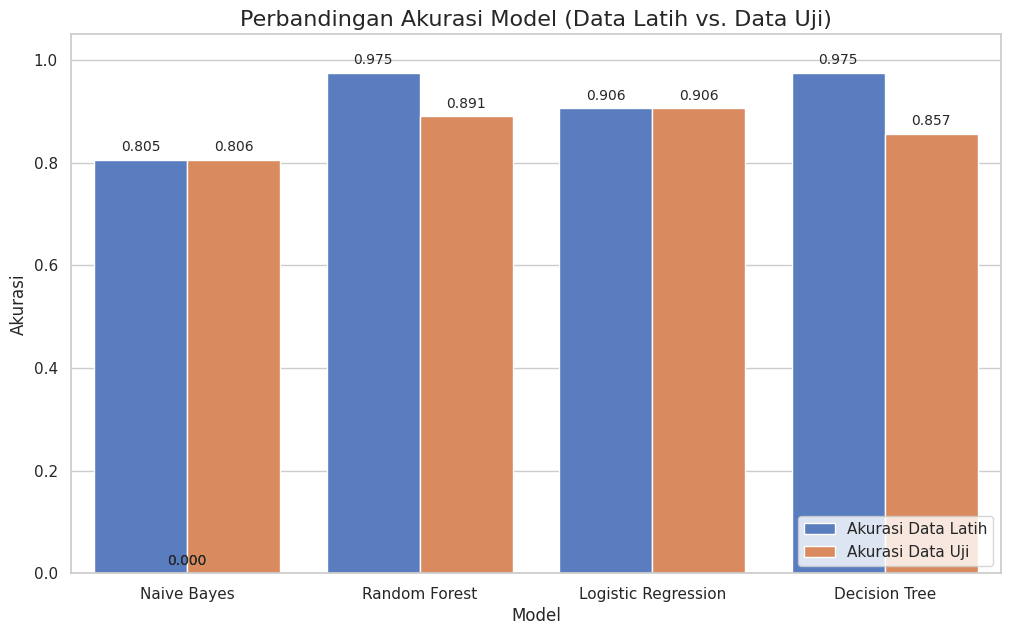

In [ ]:
# 1. Kumpulkan semua hasil akurasi ke dalam satu DataFrame
data_perbandingan = {
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Akurasi Data Latih': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Akurasi Data Uji': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
}

df_perbandingan = pd.DataFrame(data_perbandingan)

# 2. Tampilkan dalam bentuk tabel
print("Tabel Perbandingan Akurasi Model:")
print(df_perbandingan.to_string(index=False))
print("\n" + "="*50 + "\n")

# 3. Ubah format DataFrame (dari wide ke long) agar mudah di-plot dengan seaborn
df_perbandingan_long = df_perbandingan.melt('Model', var_name='Tipe Akurasi', value_name='Skor')

# 4. Buat bar chart untuk perbandingan
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Model', y='Skor', hue='Tipe Akurasi', data=df_perbandingan_long, palette='muted')

plt.title('Perbandingan Akurasi Model (Data Latih vs. Data Uji)', fontsize=16)
plt.ylabel('Akurasi', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1.05) # Set limit y-axis dari 0 sampai 105%
plt.legend(loc='lower right', fontsize=11)

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points',
                   fontsize=10)

plt.show()